In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [48]:
df = pd.read_csv("homeprices_banglore.csv")

In [49]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MaxAbsScaler()

In [50]:
scaled_x = sx.fit_transform(df.drop("price", axis = "columns"))
scaled_y = sy.fit_transform(df["price"].values.reshape(-1,1)).ravel()

In [51]:
def mini_batch_gradient_descent(X, y, batch_size, learning_rate, epochs):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    bias = 0
    total_samples = X.shape[0]
    cost_list = []
    epochs_list = []

    indices =  np.random.choice(total_samples, batch_size, replace = False)
    X_batch = X[indices]
    y_batch = y[indices]

    for i in range(epochs):
        y_predict = np.dot(w,X_batch.T) + bias

        w_mbgd = -(2/total_samples)*np.dot(X_batch.T,(y_batch-y_predict))
        bias_mbgd = -(2/total_samples)*np.sum(y_batch-y_predict)

        w = w - learning_rate*w_mbgd
        bias = bias - learning_rate*bias_mbgd

        cost = np.mean(np.square(y_batch -y_predict))

        cost_list.append(cost)
        epochs_list.append(i)

    return w, bias, cost, cost_list, epochs_list

In [52]:
w, bias, cost, cost_list, epochs_list = mini_batch_gradient_descent(scaled_x, scaled_y, 5, 0.01, 10000)
w, bias, cost

(array([0.40596553, 0.5328834 ]),
 np.float64(0.07913359811606793),
 np.float64(0.0007928075098223563))

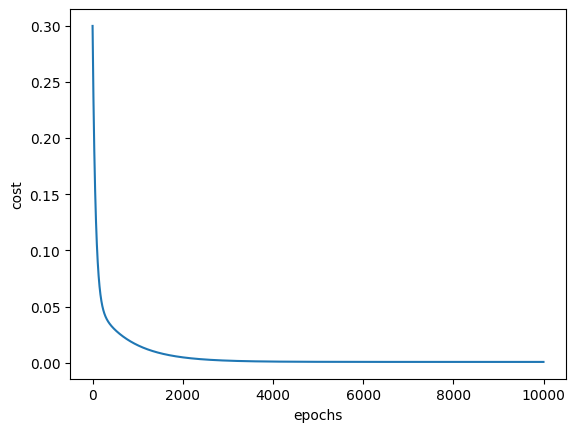

In [53]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epochs_list, cost_list)

In [54]:
def predict(area, bedroom, w, bias):
    X_scaled = sx.transform([[area, bedroom]])
    scaled_price = np.dot(w,X_scaled[0])+bias
    return sy.inverse_transform([[scaled_price]])[0][0]

In [55]:
predict(2600,4, w, bias)

C:\Users\niraj.meshram\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(122.03938457180672)